In [1]:
# import 
import networkx as nx
import osmnx as ox
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import LineString

In [13]:
# predefined
city = 'zurich'

#### 检测器

In [14]:
detectors = pd.read_csv("UTD19/detectors_public.csv").query("citycode == @city")
detectors = gpd.GeoDataFrame(detectors,geometry=gpd.points_from_xy(detectors.long,detectors.lat))
detectors.crs = "EPSG:4326"

In [15]:
pd.read_csv("UTD19/detectors_public.csv").citycode.value_counts()

citycode
london         5719
tokyo          1887
losanageles    1725
melbourne      1630
madrid         1116
utrecht        1072
zurich         1020
bern            755
augsburg        717
vilnius         581
bremen          548
munich          520
kassel          513
toulouse        478
taipeh          445
bordeaux        438
hamburg         419
torino          399
darmstadt       392
graz            300
stuttgart       298
rotterdam       259
paris           247
santander       219
toronto         188
speyer          184
manchester      181
marseille       169
bolton          166
luzern          158
strasbourg      142
wolfsburg       133
constance       122
cagliari        122
frankfurt       112
basel            77
birmingham       66
groningen        55
essen            38
innsbruck        16
Name: count, dtype: int64

In [16]:
print(detectors.crs)

EPSG:4326


       detid    length       pos    fclass            road limit citycode  \
22606  K2D11  0.377599  0.015064   primary  Seebahnstrasse    50   zurich   
22607  K2D13  0.059272  0.014468  tertiary  Badenerstrasse    50   zurich   
22608  K2D14  0.161521  0.006782   primary  Seebahnstrasse    50   zurich   
22609  K2D15  0.158996  0.020170   primary  Seebahnstrasse    50   zurich   
22610  K2D16  0.156223  0.017910   primary  Seebahnstrasse    50   zurich   

       lanes  linkid      long        lat                  geometry  
22606    1.0  1128.0  8.518458  47.375536  POINT (8.51846 47.37554)  
22607    1.0   212.0  8.518211  47.375198  POINT (8.51821 47.37520)  
22608    1.0  1109.0  8.518765  47.374964  POINT (8.51877 47.37496)  
22609    1.0  1108.0  8.518818  47.374825  POINT (8.51882 47.37483)  
22610    1.0  1106.0  8.518857  47.374831  POINT (8.51886 47.37483)  


<Axes: >

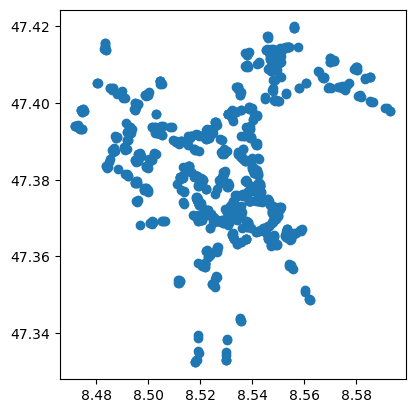

In [17]:
print(detectors.head())
detectors.plot()

#### 路网

In [28]:
links = pd.read_csv("UTD19/links.csv").query("citycode == @city")


In [24]:
print(links.head(10))


            long        lat  order  piece  linkid  group citycode
131433  8.543164  47.377691      1      1       0    0.1   zurich
131434  8.543140  47.377698      2      1       0    0.1   zurich
131435  8.542875  47.378197      3      1       0    0.1   zurich
131436  8.542758  47.378413      4      1       0    0.1   zurich
131437  8.542708  47.378511      5      1       0    0.1   zurich
131438  8.542624  47.378586      1      1       1    1.1   zurich
131439  8.542805  47.378233      2      1       1    1.1   zurich
131440  8.543108  47.377690      3      1       1    1.1   zurich
131441  8.543386  47.377156      4      1       1    1.1   zurich
131442  8.543408  47.377084      5      1       1    1.1   zurich


In [35]:
def agg_func(df):
    xy = df.sort_values("order").loc[:,["long","lat"]].values
    line = LineString(xy)
    return line
    
links_gdf = links.concat(links.groupby('linkid').apply(agg_func))
links_gdf.head(10)


linkid
0    LINESTRING (8.543164 47.377691, 8.54314 47.377...
1    LINESTRING (8.542624 47.378586, 8.542805 47.37...
2    LINESTRING (8.542594 47.378584, 8.54275 47.378...
3    LINESTRING (8.543222 47.376956, 8.54301 47.376...
4    LINESTRING (8.543233 47.37693, 8.54306 47.3769...
5    LINESTRING (8.542208 47.377031, 8.542087 47.37...
6    LINESTRING (8.542196 47.377006, 8.542079 47.37...
7    LINESTRING (8.541685 47.376937, 8.541714 47.37...
8    LINESTRING (8.54172 47.376905, 8.541776 47.376...
9    LINESTRING (8.539978 47.377211, 8.539789 47.37...
dtype: object

#### 检测器数据

In [36]:
measurements = pd.read_csv("UTD19/utd19_u.csv",dtype={'detid':str}).query("city == @city")


In [10]:
print(measurements.head())


          day  interval     detid  flow  occ  error      city  speed
0  2017-05-06         0  06.X-2li  12.0  0.0    1.0  augsburg    NaN
1  2017-05-06       300  06.X-2li  12.0  0.0    1.0  augsburg    NaN
2  2017-05-06       600  06.X-2li  12.0  0.0    1.0  augsburg    NaN
3  2017-05-06       900  06.X-2li  16.0  0.0    1.0  augsburg    NaN
4  2017-05-06      1200  06.X-2li  16.0  0.0    1.0  augsburg    NaN


##### *tokyo检测器记录缺失

In [11]:
print(pd.read_csv("UTD19/detectors_public.csv").citycode.value_counts().shape)
print(pd.read_csv("UTD19/links.csv").citycode.value_counts().shape)
print(measurements.city.value_counts().shape)

(40,)
(40,)
(39,)
